# Handin exercise for week 5: Pandas

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [2]:
import pandas as pd 
url = 'https://api.statbank.dk/v1/tables'
dst = pd.read_json(url)
dst.to_csv('dk-stat-all-tables.csv', encoding='utf-8', index=False)
dst[:20]

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,FOLK1A,Folketal den 1. i kvartalet,Antal,2022-02-11T08:00:00,2008K1,2022K1,True,"[område, køn, alder, civilstand, tid]"
1,FOLK1AM,Folketal den 1. i måneden,Antal,2022-03-07T08:00:00,2021M10,2022M02,True,"[område, køn, alder, tid]"
2,FOLK3,Folketal 1. januar,Antal,2022-02-11T08:00:00,2008,2022,True,"[fødselsdag, fødselsmåned, fødselsår, tid]"
3,BEF5,Folketal pr. 1. januar,Antal,2022-02-11T08:00:00,1990,2022,True,"[køn, alder, fødeland, tid]"
4,FT,Folketal (summariske tal fra folketællinger),Antal,2022-02-11T08:00:00,1769,2022,True,"[hovedlandsdele, tid]"
5,BY1,Folketal 1. januar,Antal,2021-04-29T08:00:00,2010,2021,True,"[byområder og landdistrikter, alder, køn, tid]"
6,BY2,Folketal 1. januar,Antal,2021-04-29T08:00:00,2010,2021,True,"[kommune, bystørrelse, alder, køn, tid]"
7,BY3,Folketal 1. januar,-,2021-04-29T08:00:00,2017,2021,True,"[byområder og landdistrikter, folketal, areal ..."
8,KM1,Folketal den 1. i kvartalet,Antal,2022-02-17T08:00:00,2007K1,2022K1,True,"[sogn, folkekirkemedlemsskab, tid]"
9,SOGN1,Folketal 1. januar,Antal,2022-02-17T08:00:00,2010,2022,True,"[sogn, køn, alder, tid]"


In [184]:
data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=F&Tid=2008K1%2C2020K4',sep=';')
data = data.set_index(['TID'])
divorced2008 = data.loc['2008K1']['INDHOLD'] 
divorced2020 = data.loc['2020K4']['INDHOLD'] 

dif = divorced2020 - divorced2008
proc = (dif / divorced2008) * 100
print(divorced2008)
print(divorced2020)
print(proc)


428864
552419
28.809832487688404


In [189]:
indbygger_per_by = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=TOT&Tid=2020K4',sep=';')
searchfor = ['Region', 'Hele']
indbygger_per_by = indbygger_per_by[~indbygger_per_by['OMRÅDE'].str.contains('|'.join(searchfor))]
indbygger_per_by = indbygger_per_by.sort_values(by='INDHOLD', ascending=False)

ser = pd.Series(indbygger_per_by[:10]['INDHOLD'].values, indbygger_per_by[:10]['OMRÅDE'].values)
print(ser)

ugift = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=U&Tid=2020K4&OMR%C3%85DE=*',sep=';')
ugift = ugift[~ugift['OMRÅDE'].str.contains('|'.join(searchfor))]
ugift = ugift.sort_values(by='INDHOLD', ascending=False)
print(ugift[:5])

d=indbygger_per_by[:5]
result = []
for index, row in d.iterrows():
    dif = row.loc['INDHOLD']-ugift.loc[index,'INDHOLD']
    result.append(ugift.loc[index,'INDHOLD']/row.loc['INDHOLD']*100)
d['%UGIFT'] = result    
print(d.sort_values(by='%UGIFT', ascending=False))

København        637936
Aarhus           353445
Aalborg          219310
Odense           205881
Vejle            116665
Esbjerg          115498
Frederiksberg    104351
Randers           98026
Viborg            96539
Silkeborg         94892
dtype: int64
       KØN  ALDER CIVILSTAND     TID         OMRÅDE  INDHOLD
2    I alt  I alt      Ugift  2020K4      København   417782
84   I alt  I alt      Ugift  2020K4         Aarhus   211863
104  I alt  I alt      Ugift  2020K4        Aalborg   120226
58   I alt  I alt      Ugift  2020K4         Odense   113639
3    I alt  I alt      Ugift  2020K4  Frederiksberg    61020
        OMRÅDE    KØN     TID  INDHOLD     %UGIFT
2    København  I alt  2020K4   637936  65.489642
84      Aarhus  I alt  2020K4   353445  59.942282
58      Odense  I alt  2020K4   205881  55.196448
104    Aalborg  I alt  2020K4   219310  54.820118
71       Vejle  I alt  2020K4   116665  47.242961


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
type(data)

pandas.core.frame.DataFrame

<IPython.core.display.Javascript object>


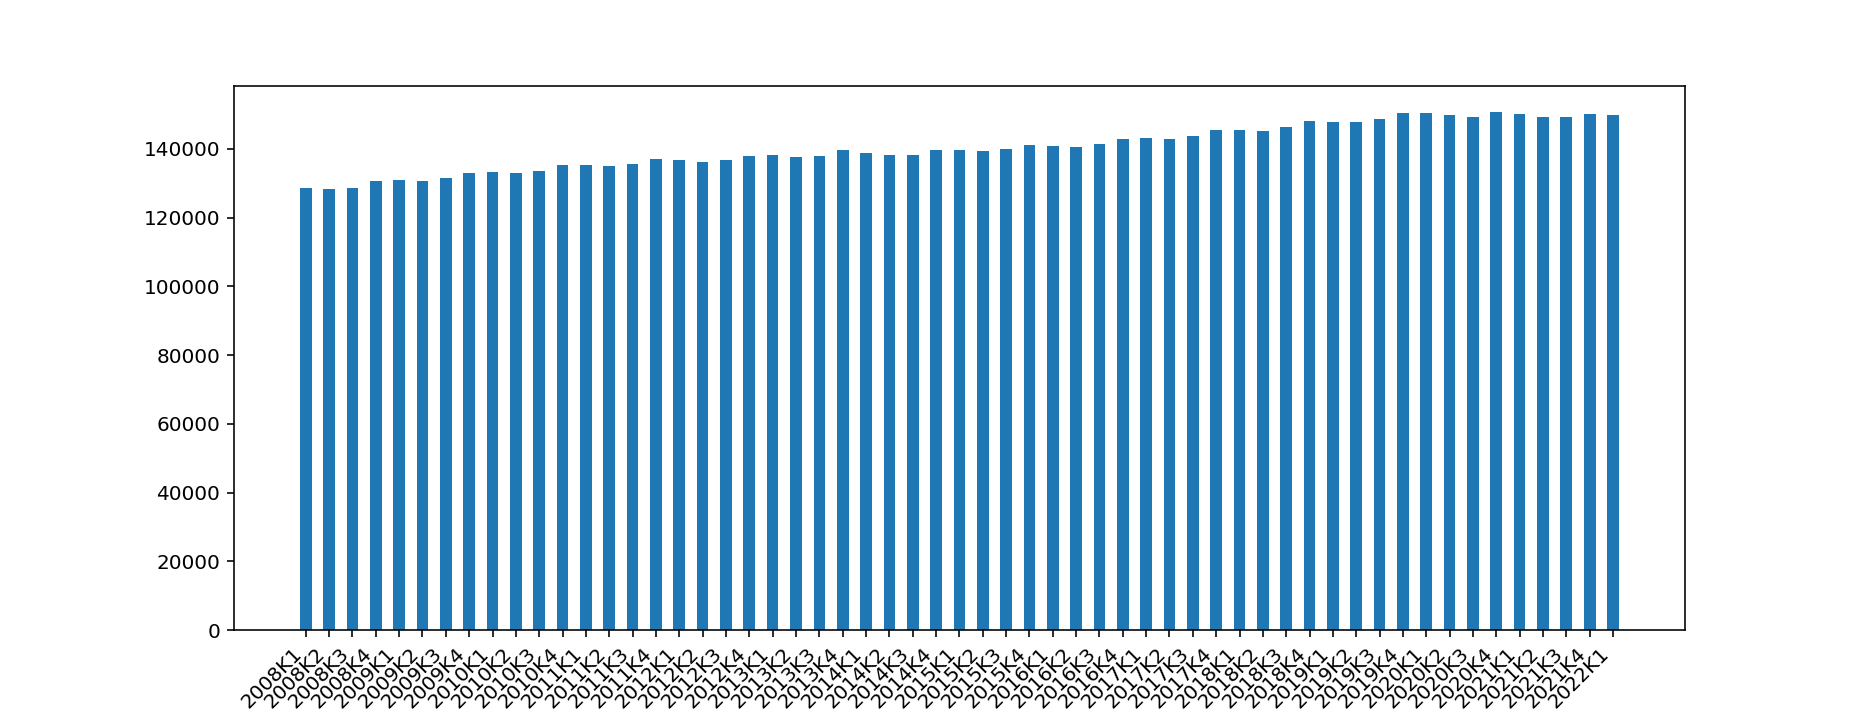

<BarContainer object of 57 artists>

In [173]:
%matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt
data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&K%C3%98N=TOT&ALDER=IALT&CIVILSTAND=G&Tid=*',sep=';')

plt.figure(figsize=(13, 5)) 
plt.xticks(rotation=45, fontsize = 10,horizontalalignment='right',fontweight='light')
plt.bar(data['TID'], data['INDHOLD'], width=0.5, align='center')


         CIVILSTAND       OMRÅDE     TID    KØN   ALDER  INDHOLD
0    Gift/separeret  Hele landet  2020K4  I alt   I alt  2138124
1    Gift/separeret  Hele landet  2020K4  I alt    0 år        0
2    Gift/separeret  Hele landet  2020K4  I alt    1 år        0
3    Gift/separeret  Hele landet  2020K4  I alt    2 år        0
4    Gift/separeret  Hele landet  2020K4  I alt    3 år        0
..              ...          ...     ...    ...     ...      ...
249           Ugift  Hele landet  2020K4  I alt  121 år        0
250           Ugift  Hele landet  2020K4  I alt  122 år        0
251           Ugift  Hele landet  2020K4  I alt  123 år        0
252           Ugift  Hele landet  2020K4  I alt  124 år        0
253           Ugift  Hele landet  2020K4  I alt  125 år        0

[254 rows x 6 columns]


<IPython.core.display.Javascript object>


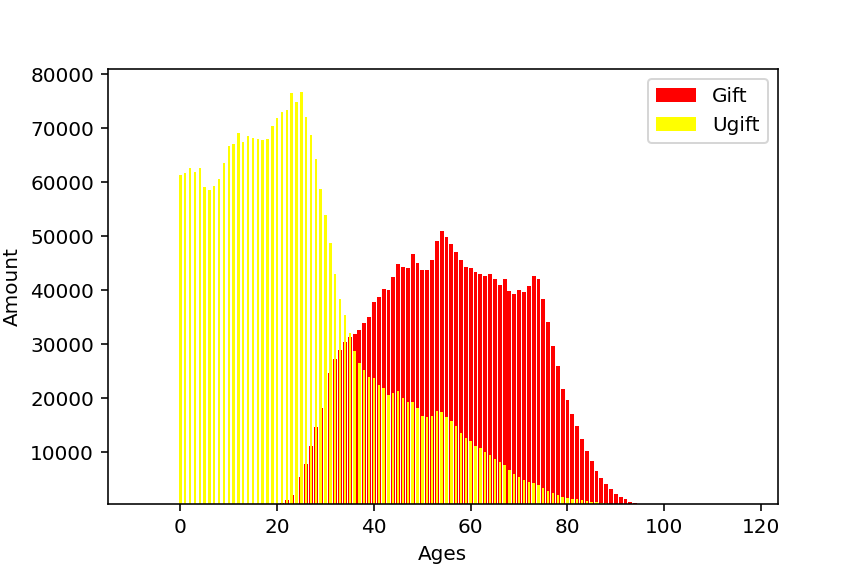

In [178]:
data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G%2CU&OMR%C3%85DE=000&Tid=2020K4&K%C3%98N=TOT&ALDER=*',sep=';')

ages = list(range(0,126))
gift = data.loc[(data['CIVILSTAND'] == "Gift/separeret") & (data['ALDER'] != "I alt"),['ALDER','INDHOLD']]
ugift = data.loc[(data['CIVILSTAND'] == "Ugift") & (data['ALDER'] != "I alt"),['ALDER','INDHOLD']]

plt.figure()
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)
p1 = plt.bar(ages, gift['INDHOLD'], width=0.8, linewidth=0, align='center', color='red')
p2 = plt.bar(ages, ugift['INDHOLD'], width=0.5, linewidth=0, align='center', color='yellow')
plt.legend([p1,p2],['Gift','Ugift'],loc=1)

In [50]:
airports = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat',sep=',',names=['1','Name','3','4','IATA','ICAO','7','8','9','10','11','12','13','14'])
new = airports[['Name','IATA','ICAO']]
new.to_csv("data/airports.csv",index=False)